Algorithm 3: Decision Tree Classifier (CART)

In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Import the required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the dataset

In [3]:
df = pd.read_csv("cleaned_early_pd_dataset.csv")

print(df.head())
print(df.info())
print(df.describe())

   patient_id  visit_month visit_id   O00391    O00533   O00584   O14498  \
0          55            0     55_0  11254.3  732430.0  39585.8  41526.9   
1          55            6     55_6  13163.6  630465.0  35220.8  41295.0   
2          55           12    55_12  15257.6  815083.0  41650.9  39763.3   
3          55           36    55_36  13530.8  753832.0  43048.9  43503.6   
4         942            6    942_6  11218.7  399518.0  20581.0  31290.9   

     O14773   O14791    O15240  ...  Q9HDC9_was_imputed  Q9NQ79_was_imputed  \
0  31238.00  4202.71  177775.0  ...                   0                   0   
1  26219.90  4416.42  165638.0  ...                   0                   0   
2  30703.60  4343.60  151073.0  ...                   0                   0   
3  33577.60  5367.06  101056.0  ...                   0                   0   
4   6173.58  2564.37  160526.0  ...                   0                   0   

   Q9NYU2_was_imputed  Q9UBR2_was_imputed  Q9UBX5_was_imputed  \
0  

In [4]:
X = df.drop("label", axis=1)
y = df["label"]

Train the decision tree model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
y_pred = dt_classifier.predict(X_test)

Performance metrics

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9688473520249221
Confusion Matrix:
 [[108   5]
 [  5 203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.98      0.98      0.98       208

    accuracy                           0.97       321
   macro avg       0.97      0.97      0.97       321
weighted avg       0.97      0.97      0.97       321



Plot the confusion matrix

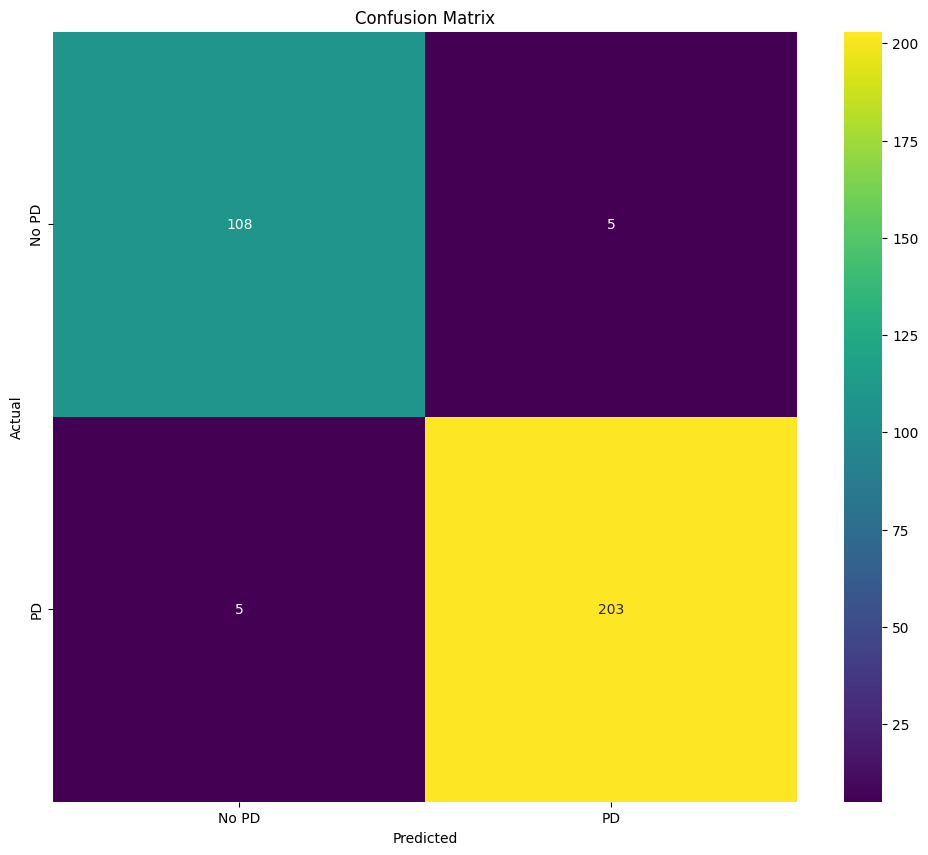

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', xticklabels=['No PD', 'PD'], yticklabels=['No PD', 'PD'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Plot the decision tree

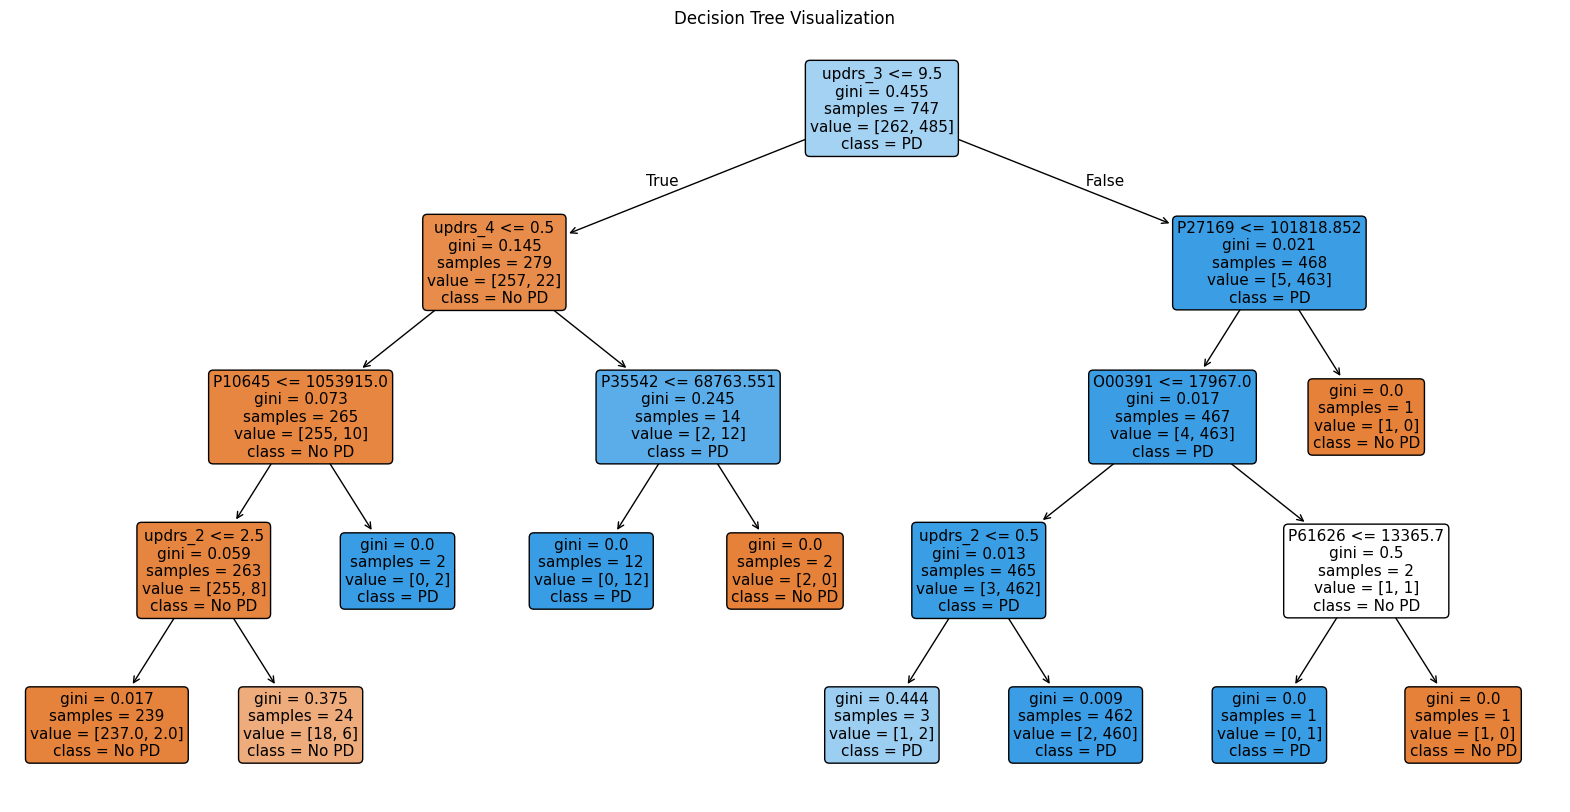

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No PD', 'PD'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Determine and plot the importance features used in this classification

In [30]:
importances = dt_classifier.feature_importances_
feature_names = X.columns

In [34]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df[importance_df['Importance'] > 0]
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)
for index, row in importance_df.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']:.5f}")
          

Feature: updrs_3, Importance: 0.90016
Feature: updrs_4, Importance: 0.05547
Feature: P10645, Importance: 0.01159
Feature: P35542, Importance: 0.01065
Feature: updrs_2, Importance: 0.00992
Feature: P27169, Importance: 0.00609
Feature: P61626, Importance: 0.00311
Feature: O00391, Importance: 0.00301


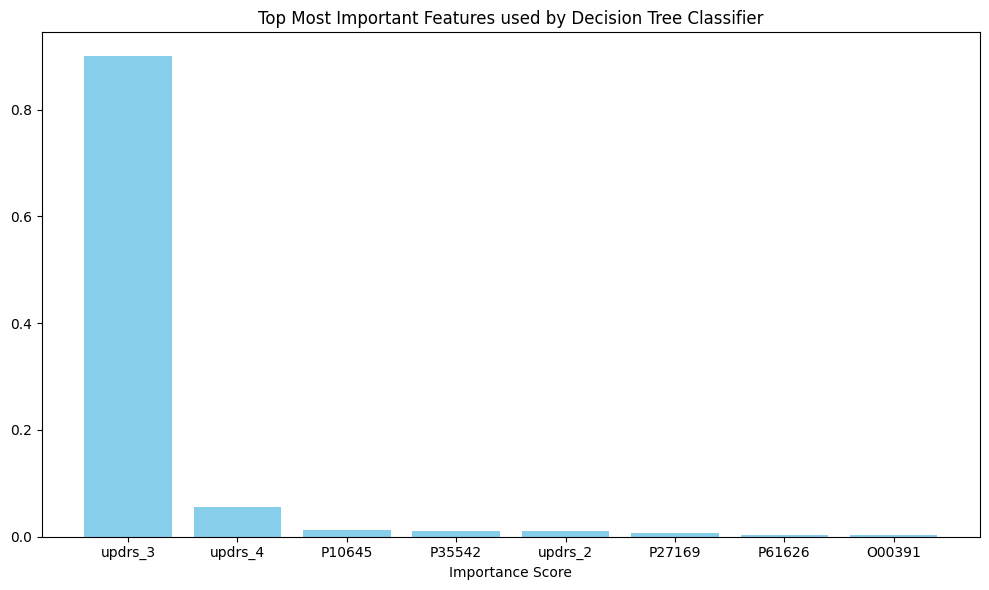

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top Most Important Features used by Decision Tree Classifier')
plt.tight_layout()
plt.show()